<a href="https://colab.research.google.com/github/wrozal/MIW-pjatk/blob/main/MP5/pro5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

##1. Load the full iris data set. Propose and implement the division of this data into training and test data and perform normalizations on them.

In [2]:
iris = datasets.load_iris()
X = iris.data
yy = iris.target
y=to_categorical(yy)
norm=np.linalg.norm(X)
X/=norm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

##2. Propose an optimal neural network to classify the loaded data. Use a nonlinear activation function in the hidden layer (e.g., tanh or sigmoidal). Using back propagation of error train the network using batch method.

In [3]:
class Sigmoid():
  def acti(self, s):
    return 1 / (1 + np.exp(-s))
  def der(self, x):
    a = self.acti(x)
    return a * (1 - a)

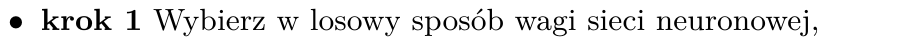

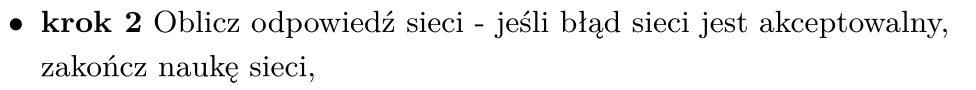

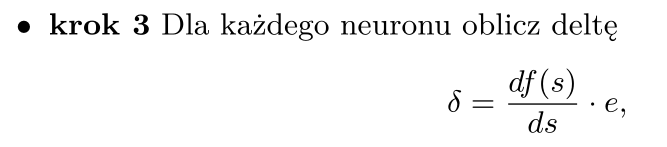

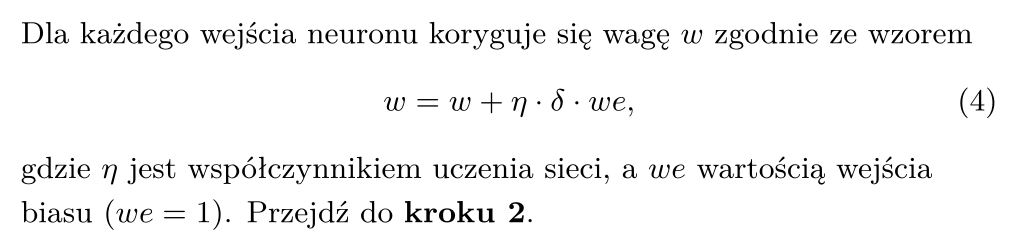

In [4]:
class Neuron():
  def __init__(self, input, acti, eta):
    self.W=np.random.rand(input)*2-1
    self.Wb=np.random.rand(1)[0]
    self.acti=acti
    self.eta=eta

  def predict(self, x):
    y=self.W*x
    y=sum(y)
    y+=self.Wb
    self.last_s=y
    return self.acti.acti(y)

  def fit(self, e):
    e_p=self.W*e
    d=self.acti.der(self.last_s)*e
    self.W=self.W+self.eta*d
    self.Wb=self.Wb+self.eta*d
    return e_p

In the case of hidden layers, the error for a neuron is counted as the sum of the products of the weights connecting to the next layer and the error of a given neuron of the next layer, it is important that the weights of the next layer are taken before they are modified. In the case of the output layer, the error is calculated directly

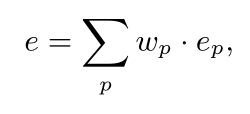

In [5]:
class Layer():
  def __init__(self, input, output, acti, eta):
    self.neurons=[]
    self.input=input
    for i in range(output):
      self.neurons.append(Neuron(input, acti, eta))

  def predict(self, x):
    y=[]
    for n in self.neurons:
      y.append(n.predict(x))
    return y

  def fit(self, e):
    e_p=np.zeros(self.input)
    for i, n in enumerate(self.neurons):
      e_p_one = n.fit(e[i])
      e_p=e_p+e_p_one
    return e_p

In [6]:
class NeuronNetwork():
  def __init__(self, layers, acti, eta):
    self.layers=[]
    for i in range(1, len(layers)):
      self.layers.append(Layer(layers[i-1], layers[i], acti, eta))
  
  def predict(self, x):
    x_in=x.copy()
    for l in self.layers:
      x_in=l.predict(x_in)
    return x_in

  def fit(self, e):
    layers_reverse = self.layers.copy()
    layers_reverse.reverse()
    for l in layers_reverse:
      e = l.fit(e)

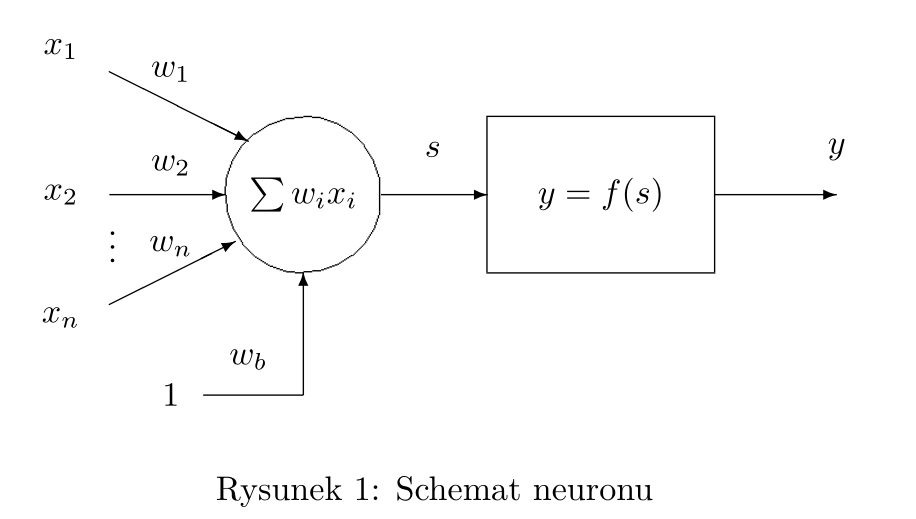

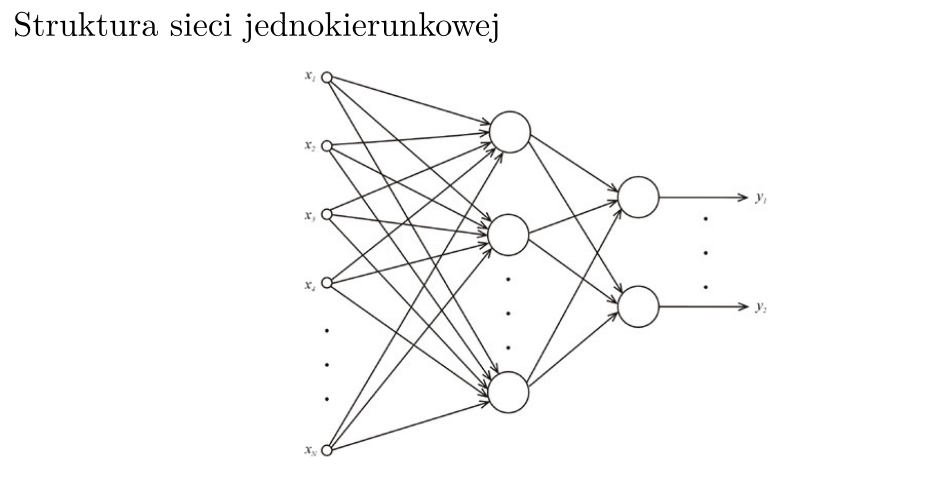

In [7]:
def batch(NN, epoch=100):
  accuracy=[]
  loss=[]
  for i in range(epoch):
    # print('================================')
    # print(i)
    e=0
    a=0
    for xe, ye in zip(X, y):
      # print('---------------------')
      p = NN.predict(xe)
      e+=(ye-p)
      # print(p)
      # print(ye)
      if np.argmax(p) == np.argmax(ye):
        a+=1
      #   print('dobrze')
      # else:
      #   print('zle')
      # print(p)
      # print(ye)
    e/=len(X)
    NN.fit(e)
    # print(e)
    loss.append(e)
    accuracy.append(a/len(y))
  plt.plot(accuracy)
  plt.ylabel('accuracy')
  plt.show()
  plt.plot(np.array(loss)[:,0], label='class 0')
  plt.plot(np.array(loss)[:,1], label='class 1')
  plt.plot(np.array(loss)[:,2], label='class 2')
  plt.ylabel('loss')
  plt.legend()
  plt.show()


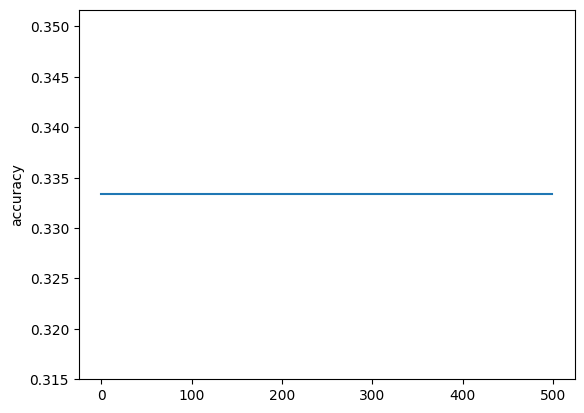

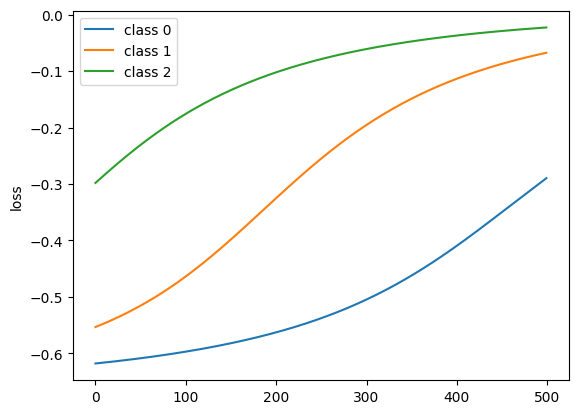

In [8]:
batch(NeuronNetwork([4, 10, 3], Sigmoid(), 0.01), 500)

In [9]:
def online(NN, epoch=100):
  accuracy=[]
  loss=[]
  for i in range(epoch):
    # print('================================')
    # print(i)
    a=0
    loss_e=0
    for xe, ye in zip(X, y):
      p = NN.predict(xe)
      e=ye-p
      loss_e+=e
      NN.fit(e)
      if np.argmax(p) == np.argmax(ye):
        # print('dobrze')
        a+=1
      # print('-----------------')
      # print(ye)
      # print(p)

    accuracy.append(a/len(y))
    loss.append(loss_e)
  plt.plot(accuracy)
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()
  plt.plot(np.array(loss)[:,0], label='class 0')
  plt.plot(np.array(loss)[:,1], label='class 1')
  plt.plot(np.array(loss)[:,2], label='class 2')
  plt.ylabel('loss')
  plt.legend()
  plt.show()


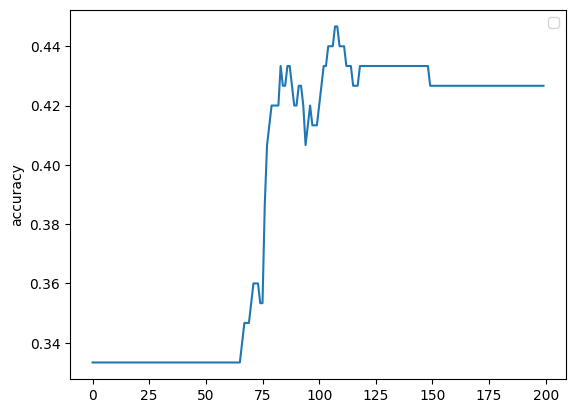

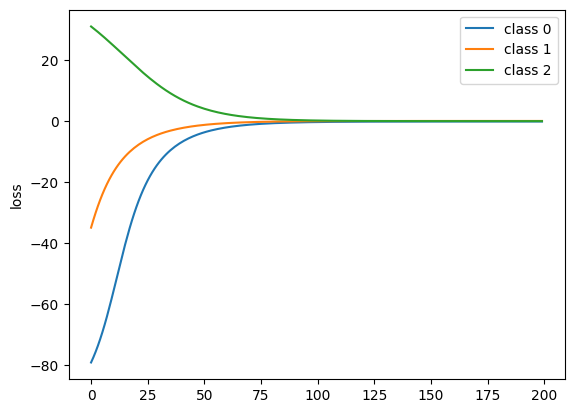

In [10]:
online(NeuronNetwork([4, 10, 3], Sigmoid(), 0.001), 200)